<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/Credit_Scoring_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seguimiento de Nuevas Cosechas**

### **1. Carga Inicial de Librerías**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline

### **2. Carga y Análisis inicial de datos**

In [ ]:
df_nc = pd.read_csv('Base_SolicitudesCreditoEfectivo_NuevasCosechas.csv', sep = ",")
df_nc.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201506,18146,1492.8573,36,0,NaN,0,CLIENTES SIGNATURE,1,0,...,1076.7616,TECNICO,JUNIN,CON,29.0000,86.6672,842.0000,60.0000,0.0000,0.0000
1,201506,18162,8153.6669,60,0,NaN,0,CLIENTES PLATINUM SEGM 2,0,0,...,7239.3483,INGENIERO,LIMA_SUR,CAS,29.0000,1396.3111,7930.0000,157.0000,1.0000,1.0000
2,201506,18168,23325.8958,60,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,5115.3840,TECNICO,ANCASH,SOL,32.0000,90.2233,20100.0000,170.0000,0.0000,0.0000
3,201506,18181,10743.2412,48,0,NaN,0,CLIENTES ORO,0,0,...,2178.7147,INGENIERO DE SISTEMAS,AREQUIPA,SOL,37.0000,1676.7992,1679.0000,136.0000,1.0000,1.0000
4,201506,18196,2665.8167,36,0,NaN,0,CLIENTES ORO,1,0,...,1299.6343,PROFESOR,LIMA_NORTE,SOL,32.0000,47.0492,900.0000,60.0000,0.0000,0.0000


In [ ]:
df_ref = pd.read_csv('Base_SolicitudesCreditoEfectivo_Test.csv', sep = ",", index_col=False)
df_ref.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
0,201402,10380,5927.3683,24,0,NaN,CLIENTES PLATINUM SEGM 2,1,0,0,...,ECONOMISTA,LIMA_MODERNA,SOL,32.0000,1508.9936,30000.0000,350.0000,0.0000,0.0000,0
1,201406,18075,1076.6567,12,0,NaN,CLIENTES ORO,1,0,0,...,TECNICO,JUNIN,SOL,30.0000,151.0679,15500.0000,60.0000,0.0000,0.0000,0
2,201311,1450,2685.5720,48,0,201405.0000,CLIENTES ORO,1,0,0,...,ADMINISTRADOR,LIMA_ESTE,SOL,27.0000,5.4600,500.0000,60.0000,0.0000,0.0000,1
3,201310,11242,4310.8133,24,0,NaN,CLIENTES ORO,1,0,0,...,TECNICO,CUZCO,SOL,44.0000,251.5010,6290.0000,170.0000,0.0000,0.0000,0
4,201405,17106,482.0730,12,0,NaN,CLIENTES ORO,1,0,0,...,TECNICO,PIURA,SOL,24.0000,31.9360,1500.0000,60.0000,0.0000,0.0000,0


#### Corregimos los tipos de variables, este paso es circunstancial

In [ ]:
df_ref['CODMES']=df_ref['CODMES'].astype(str)
df_ref['CODSOLICITUD']=df_ref['CODSOLICITUD'].astype(str)
df_ref['MIN_MES_DE_DEFAULT']=df_ref['MIN_MES_DE_DEFAULT'].astype(str)
df_ref['FLG_GARANTIA']=df_ref['FLG_GARANTIA'].astype(str)
df_ref['TARJETA_RELACIONADA']=df_ref['TARJETA_RELACIONADA'].astype(str)
df_ref['VEHICULAR_RELACIONADA']=df_ref['VEHICULAR_RELACIONADA'].astype(str)
df_ref['HIPOTECARIO_RELACIONADA']=df_ref['HIPOTECARIO_RELACIONADA'].astype(str)
df_ref['CLASIF_SISTEMA_ULT_12M']=df_ref['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_ref['FLG_PDH']=df_ref['FLG_PDH'].astype(str)
df_ref['FLG_TC_VISA']=df_ref['FLG_TC_VISA'].astype(str)
df_ref['FLG_TC_MC']=df_ref['FLG_TC_MC'].astype(str)

In [ ]:
df_nc['CODMES']=df_nc['CODMES'].astype(str)
df_nc['CODSOLICITUD']=df_nc['CODSOLICITUD'].astype(str)
df_nc['MIN_MES_DE_DEFAULT']=df_nc['MIN_MES_DE_DEFAULT'].astype(str)
df_nc['FLG_GARANTIA']=df_nc['FLG_GARANTIA'].astype(str)
df_nc['TARJETA_RELACIONADA']=df_nc['TARJETA_RELACIONADA'].astype(str)
df_nc['VEHICULAR_RELACIONADA']=df_nc['VEHICULAR_RELACIONADA'].astype(str)
df_nc['HIPOTECARIO_RELACIONADA']=df_nc['HIPOTECARIO_RELACIONADA'].astype(str)
df_nc['CLASIF_SISTEMA_ULT_12M']=df_nc['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_nc['FLG_PDH']=df_nc['FLG_PDH'].astype(str)
df_nc['FLG_TC_VISA']=df_nc['FLG_TC_VISA'].astype(str)
df_nc['FLG_TC_MC']=df_nc['FLG_TC_MC'].astype(str)

#### Como se ve nuestra muestra de referencia

# Buen_Pagador: 8977
# 1 Mora_12M: 607
Bad rate: 0.0633347245409015


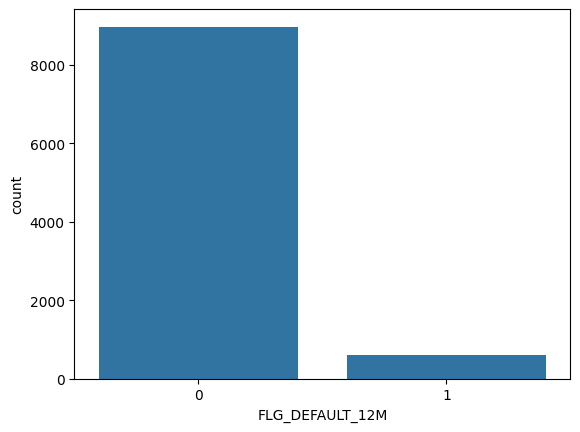

In [ ]:
sns.countplot(data = df_ref, x = "FLG_DEFAULT_12M")
target_count = df_ref.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

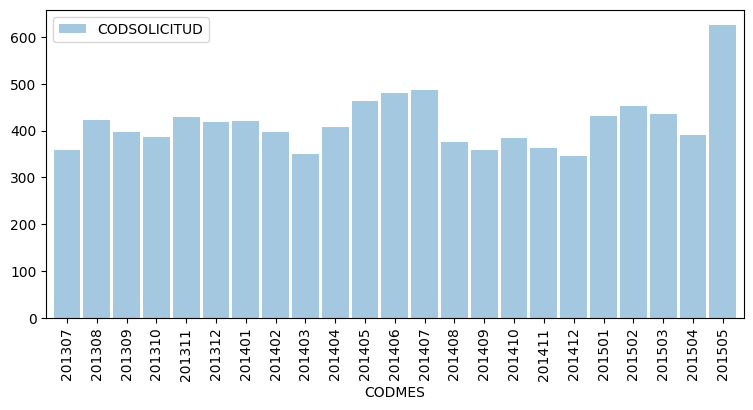

In [ ]:
a1=df_ref.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

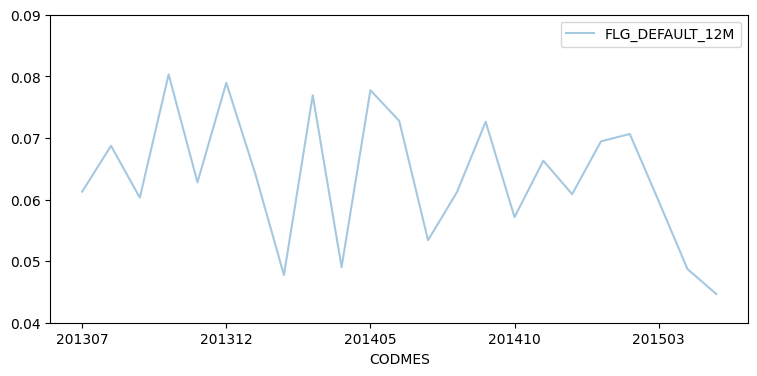

In [ ]:
a2=df_ref.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.04,0.09))

####  Como se ve la nueva muestra

# Buen_Pagador: 8423
# 1 Mora_12M: 550
Bad rate: 0.06129499609940934


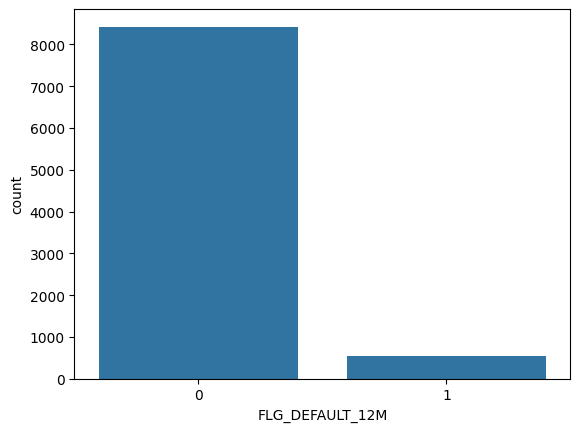

In [ ]:
sns.countplot(data = df_nc, x = "FLG_DEFAULT_12M")
target_count = df_nc.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

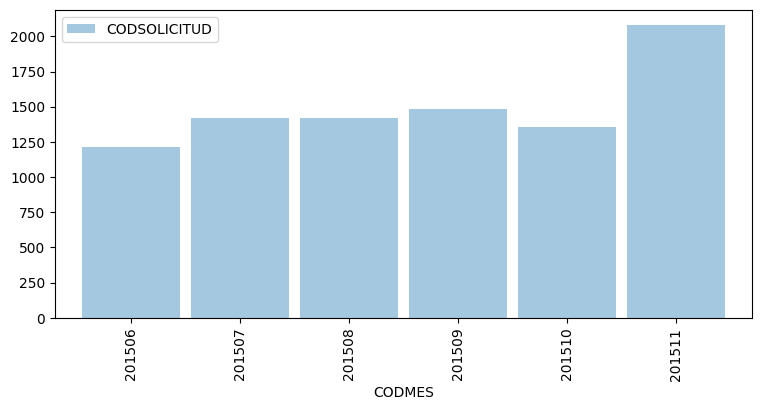

In [ ]:
a1=df_nc.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

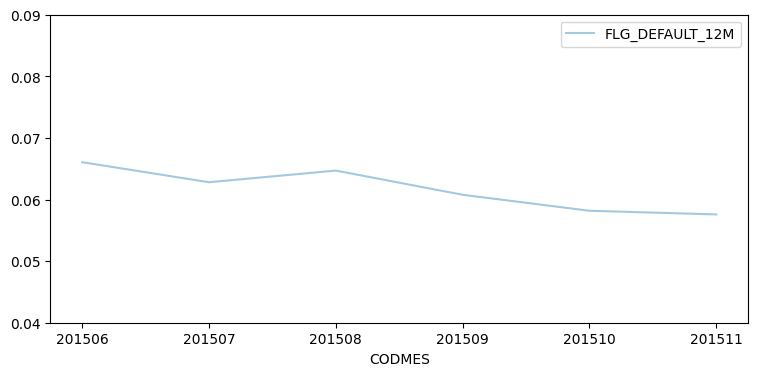

In [ ]:
a2=df_nc.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.04,0.09))

### **3. Carga de los artefactos desarrollados en el entranamiento**

#### En esta parte, llamamos a los pickles del Feature Engineering como del Modelo Final para su uso

In [ ]:
import pickle

In [ ]:
pip install feature_engine

In [ ]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pickle','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [ ]:
# Cargar el modelo
with open('final_model.pickle','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

### Con lo anterior apliquemos los pickles a nuestras muestras

In [ ]:
#Probemos el pipeline
df_ref_xt=fe_final.transform(df_ref.drop(['FLG_DEFAULT_12M'],axis=1))
df_nc_xt=fe_final.transform(df_nc.drop(['FLG_DEFAULT_12M'],axis=1))
df_ref_y=df_ref['FLG_DEFAULT_12M']
df_nc_y=df_nc['FLG_DEFAULT_12M']

In [ ]:
tot_df_ref_xt=pd.concat([df_ref_xt, df_ref_y],axis=1)
tot_df_nc_xt=pd.concat([df_nc_xt, df_nc_y],axis=1)

### **4. ROC - GINI**

#### Primero, evaluemos el poder predictivo del modelo en la nueva muestra, comparado con las métricas obtenidas en la muestra de referencia (test)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Probemos el modelo
pred_ref = modelo_final.predict_proba(df_ref_xt)
pred_nc = modelo_final.predict_proba(df_nc_xt)
print('BaseLine roc-auc: ',roc_auc_score(df_ref_y, pred_ref[:,1]), 'GINI: ', 2*roc_auc_score(df_ref_y, pred_ref[:,1])-1 )
print('New roc-auc: ', roc_auc_score(df_nc_y, pred_nc[:,1]), 'GINI: ', 2*roc_auc_score(df_nc_y, pred_nc[:,1])-1 )

BaseLine roc-auc:  0.7479820753714554 GINI:  0.4959641507429109
New roc-auc:  0.8033417158645699 GINI:  0.6066834317291399


#### Podemos complementar este análisis con un Bootstrapping de la muestra nueva, para ver si el GINI inicial se encuentra dentro de los posibles valores generados

In [ ]:
from sklearn.utils import resample

In [ ]:
bootstrap_iter = 20
roc_auc = []

In [ ]:
for i in range(bootstrap_iter):
    X_, y_ = resample(df_nc_xt, df_nc_y)
    y_pred = modelo_final.predict_proba(X_)
    acc = roc_auc_score(y_,y_pred[:,1])
    roc_auc.append(acc)

In [ ]:
roc_auc_final = np.array(roc_auc)

In [ ]:
gini_final=2*roc_auc_final-1

In [ ]:
print('GINI')
print('Average: ', gini_final.mean())
print('Standard deviation: ', gini_final.std())

GINI
Average:  0.6025865493761647
Standard deviation:  0.016343819989847033


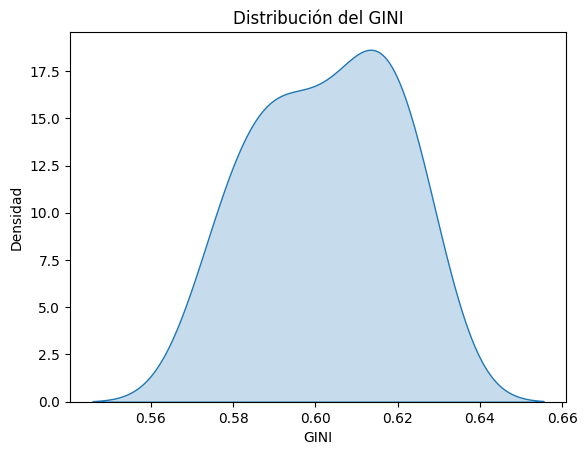

In [ ]:
sns.kdeplot(gini_final, shade=True)
plt.title('Distribución del GINI')
plt.xlabel('GINI')
plt.ylabel('Densidad')
plt.show()

In [ ]:
#bandas de confianza
from scipy.stats import norm
z_value = norm.ppf((1 + 0.99) / 2)

In [ ]:
LS=gini_final.mean()+z_value*gini_final.std()
LS

np.float64(0.644685439837941)

In [ ]:
LI=gini_final.mean()-z_value*gini_final.std()
LI

np.float64(0.5604876589143885)

#### Luego, también es importante verificar como se ve el poder discriminatorio de cada variable en la nueva muestra vs el baseline (referencia)

In [ ]:
# Función para calcular el ROC AUC de cada variable
def calcular_gini(df, target):
    gini = {}
    for col in df.columns:
        if col != target:
            try:
                gini[col] = 2*roc_auc_score(df[target], df[col])-1
            except:
                gini[col] = np.nan  # Si la variable tiene solo un valor, se pone NaN
    return gini

In [ ]:
gini_ref = calcular_gini(tot_df_ref_xt, 'FLG_DEFAULT_12M')
gini_nc = calcular_gini(tot_df_nc_xt, 'FLG_DEFAULT_12M')

In [ ]:
df_gini = pd.DataFrame({'Gini_Ref': gini_ref, 'Gini_NC': gini_nc})
df_gini['Diferencia'] = df_gini['Gini_NC'] - df_gini['Gini_Ref']

In [ ]:
df_gini

,Gini_Ref,Gini_NC,Diferencia
SEGMENTOCLIENTE,0.1205,0.0848,-0.0357
CLASIF_SISTEMA_ULT_12M,0.1347,0.1678,0.0331
FLG_PDH,0.1169,0.1078,-0.0091
PROFESION,0.1026,0.1301,0.0275
ZONA_DEL_DESEMBOLSO,0.1438,0.1328,-0.0109
ESTADO_CIVIL,0.1076,0.1003,-0.0073
FLG_GARANTIA,0.0225,0.0313,0.0087
MEDIANA_AHORROS_ULT_6M,0.2705,0.3192,0.0486
MESES_AHORROS_ULT_6M,0.2253,0.2510,0.0257
LINEA_DE_TC,0.1226,0.1294,0.0069


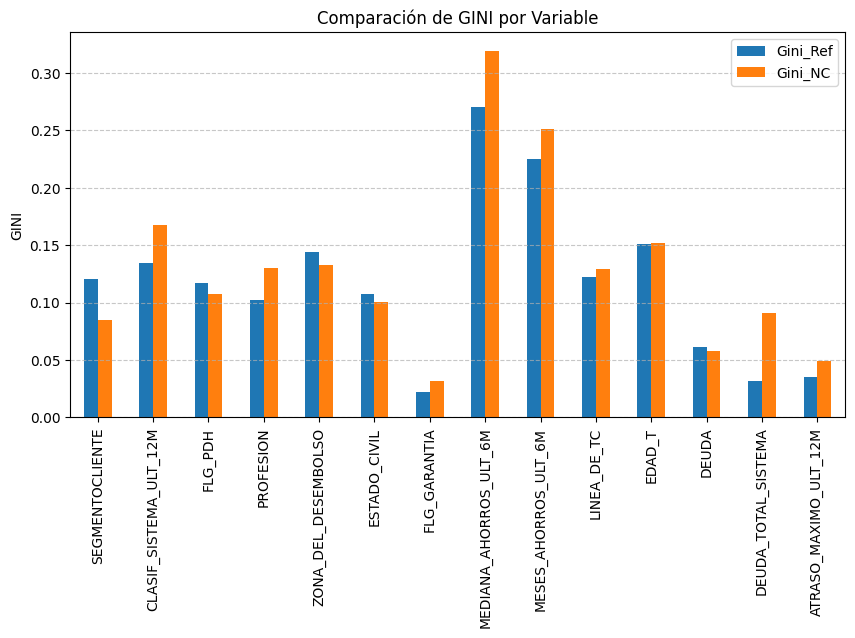

In [ ]:
df_gini[['Gini_Ref', 'Gini_NC']].plot(kind='bar', figsize=(10, 5), title="Comparación de GINI por Variable")
plt.ylabel("GINI")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **5. PSI y CSI**

#### EL PSI (Population Stability Index) busca medir la estabilidad de la población basado en la comparación de la distribución por rangos fijos o percentilicos, a partir de un baseline o muestra de referencia

In [ ]:
pd.DataFrame(pred_ref[:,1]).describe()

,0
count,9584.0000
mean,0.0636
std,0.0437
min,0.0015
25%,0.0305
50%,0.0536
75%,0.0877
max,0.2627


In [ ]:
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

In [ ]:
buckets = 10
raw_breakpoints = np.arange(0, buckets + 1) / (buckets) * 100
breakpoints = scale_range(raw_breakpoints, np.min(pred_ref[:,1]), np.max(pred_ref[:,1]))

In [ ]:
initial_counts = np.histogram(pred_ref[:,1], breakpoints)[0]
new_counts = np.histogram(pred_nc[:,1], breakpoints)[0]

In [ ]:
df = pd.DataFrame({'Bucket': np.arange(1, 11), 'Breakpoint Value':breakpoints[1:], 'Initial Count':initial_counts, 'New Count':new_counts})
df['Initial Percent'] = df['Initial Count'] / len(pred_ref[:,1])
df['New Percent'] = df['New Count'] / len(pred_nc[:,1])

In [ ]:
df['New Percent'][df['New Percent'] == 0] = 0.001

In [ ]:
df

,Bucket,Breakpoint Value,Initial Count,New Count,Initial Percent,New Percent
0,1,0.0276,2093,2117,0.2184,0.2359
1,2,0.0537,2708,2690,0.2826,0.2998
2,3,0.0798,1947,1728,0.2032,0.1926
3,4,0.1059,1272,1106,0.1327,0.1233
4,5,0.1321,725,639,0.0756,0.0712
5,6,0.1582,477,390,0.0498,0.0435
6,7,0.1843,228,171,0.0238,0.0191
7,8,0.2104,87,86,0.0091,0.0096
8,9,0.2365,31,33,0.0032,0.0037
9,10,0.2627,16,8,0.0017,0.0009


In [ ]:
percents = df[['Initial Percent', 'New Percent', 'Bucket']] \
             .melt(id_vars=['Bucket']) \
             .rename(columns={'variable':'Population', 'value':'Percent'})

In [ ]:
percents

,Bucket,Population,Percent
0,1,Initial Percent,0.2184
1,2,Initial Percent,0.2826
2,3,Initial Percent,0.2032
3,4,Initial Percent,0.1327
4,5,Initial Percent,0.0756
5,6,Initial Percent,0.0498
6,7,Initial Percent,0.0238
7,8,Initial Percent,0.0091
8,9,Initial Percent,0.0032
9,10,Initial Percent,0.0017


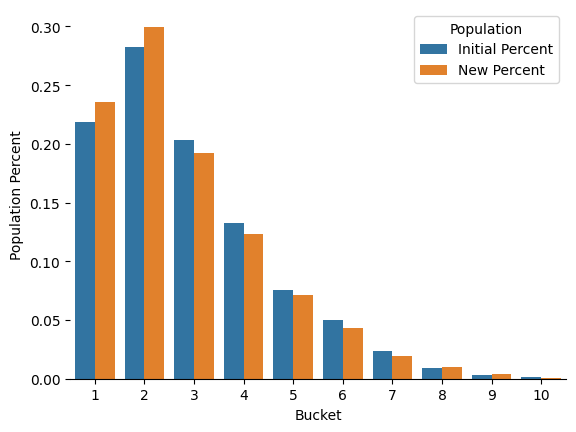

In [ ]:
p = sns.barplot(x="Bucket", y="Percent", hue="Population", data=percents)
p.set(xlabel='Bucket', ylabel='Population Percent')
sns.despine(left=True)

In [ ]:
df['PSI'] = (df['New Percent'] - df['Initial Percent']) * np.log(df['New Percent'] / df['Initial Percent'])

In [ ]:
df

,Bucket,Breakpoint Value,Initial Count,New Count,Initial Percent,New Percent,PSI
0,1,0.0276,2093,2117,0.2184,0.2359,0.0014
1,2,0.0537,2708,2690,0.2826,0.2998,0.0010
2,3,0.0798,1947,1728,0.2032,0.1926,0.0006
3,4,0.1059,1272,1106,0.1327,0.1233,0.0007
4,5,0.1321,725,639,0.0756,0.0712,0.0003
5,6,0.1582,477,390,0.0498,0.0435,0.0009
6,7,0.1843,228,171,0.0238,0.0191,0.0010
7,8,0.2104,87,86,0.0091,0.0096,0.0000
8,9,0.2365,31,33,0.0032,0.0037,0.0001
9,10,0.2627,16,8,0.0017,0.0009,0.0005


In [ ]:
sum(df['PSI'])

0.0063855577238726615

#### Según este valor, no observamos una variación significativa en las poblaciones de referencia y nueva

#### Seteamos una función para calcular el PSI y CSI

In [ ]:
def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    def psi(expected_array, actual_array, buckets):
        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input

        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])

        expected_fractions = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_fractions = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = sum(sub_psi(expected_fractions[i], actual_fractions[i]) for i in range(0, len(expected_fractions)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[1 - axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [ ]:
calculate_psi(pred_ref[:,1], pred_nc[:,1], buckettype='bins', buckets=10, axis=0)

np.float64(0.006385557723872662)

In [ ]:
calculate_psi(pred_ref[:,1], pred_nc[:,1], buckettype='quantiles', buckets=10, axis=0)

np.float64(0.006372709654426633)

#### EL CSI (Characteristic Stability Index) es similar al PSI pero sobre las distribuciones de cada variable

In [ ]:
# Rangos Fijos
print("CSI - Rangos Fijos")
for col in df_ref_xt.columns:
    csi_values = calculate_psi(df_ref_xt[col].values, df_nc_xt[col].values, buckettype='bins', buckets=10, axis=0)
    csi = np.sum(csi_values)
    print(f'{col} -> {csi=:.4f}')

CSI - Rangos Fijos
SEGMENTOCLIENTE -> csi=0.0002
CLASIF_SISTEMA_ULT_12M -> csi=0.0007
FLG_PDH -> csi=0.0002
PROFESION -> csi=0.0009
ZONA_DEL_DESEMBOLSO -> csi=0.0005
ESTADO_CIVIL -> csi=0.0012
FLG_GARANTIA -> csi=0.0000
MEDIANA_AHORROS_ULT_6M -> csi=0.0026
MESES_AHORROS_ULT_6M -> csi=0.0060
LINEA_DE_TC -> csi=0.0012
EDAD_T -> csi=0.0013
DEUDA -> csi=0.0023
DEUDA_TOTAL_SISTEMA -> csi=0.0072
ATRASO_MAXIMO_ULT_12M -> csi=0.0021


In [ ]:
# Rangos Percentílicos
print("CSI - Rango Percentílicos")
for col in df_ref_xt.columns:
    csi_values = calculate_psi(df_ref_xt[col].values, df_nc_xt[col].values, buckettype='quantile', buckets=10, axis=0)
    csi = np.sum(csi_values)
    print(f'{col} -> {csi=:.4f}')

CSI - Rango Percentílicos
SEGMENTOCLIENTE -> csi=0.0000
CLASIF_SISTEMA_ULT_12M -> csi=0.0003
FLG_PDH -> csi=0.0002
PROFESION -> csi=0.0001
ZONA_DEL_DESEMBOLSO -> csi=0.0002
ESTADO_CIVIL -> csi=0.0000
FLG_GARANTIA -> csi=0.0000
MEDIANA_AHORROS_ULT_6M -> csi=0.0005
MESES_AHORROS_ULT_6M -> csi=0.0016
LINEA_DE_TC -> csi=0.0000
EDAD_T -> csi=0.0001
DEUDA -> csi=0.0001
DEUDA_TOTAL_SISTEMA -> csi=0.0002
ATRASO_MAXIMO_ULT_12M -> csi=0.0019


### **6. Calibración**

#### Veamos rápidamente la PD Promedio vs la RD de la nueva muestra

In [ ]:
print('La PD Promedio Baseline es: ', pred_ref[:,1].mean(), 'El RD Baseline es de: ', df_ref_y.mean())

La PD Promedio Baseline es:  0.06361669439551088 El RD Baseline es de:  0.0633347245409015


In [ ]:
print('La PD Promedio Nueva es: ', pred_nc[:,1].mean(), 'El RD Nueva es de: ', df_nc_y.mean())

La PD Promedio Nueva es:  0.060742456183100285 El RD Nueva es de:  0.06129499609940934


In [ ]:
from sklearn.calibration import calibration_curve
# Una función para evaluar la calibración
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='PD vs RD')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

#### Como se ve en la muestra inicial o de test

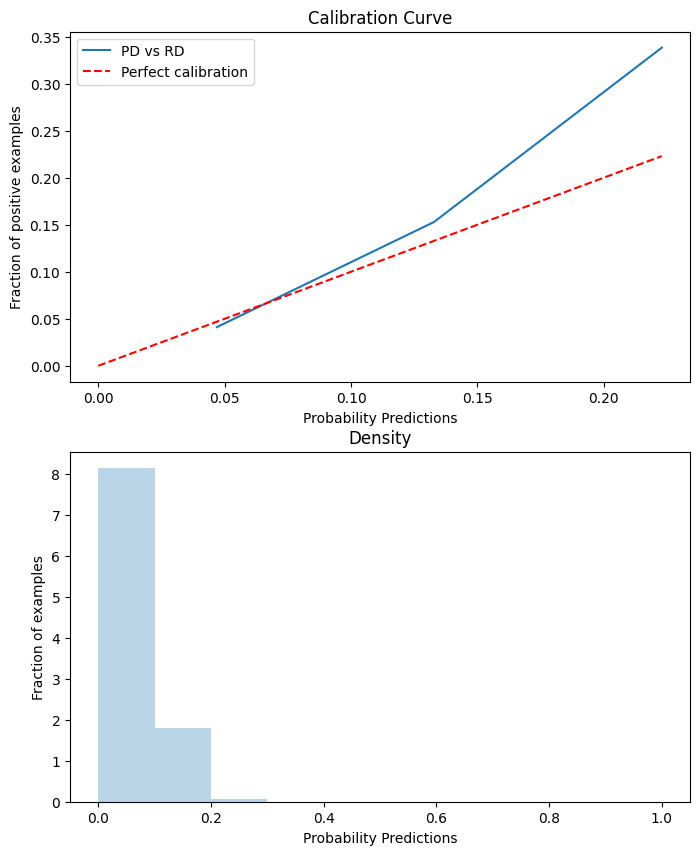

In [ ]:
plot_calibration_curve(df_ref_y, pred_ref[:, 1], bins=10, strategy='uniform')

#### Como se ve en la nueva cosecha

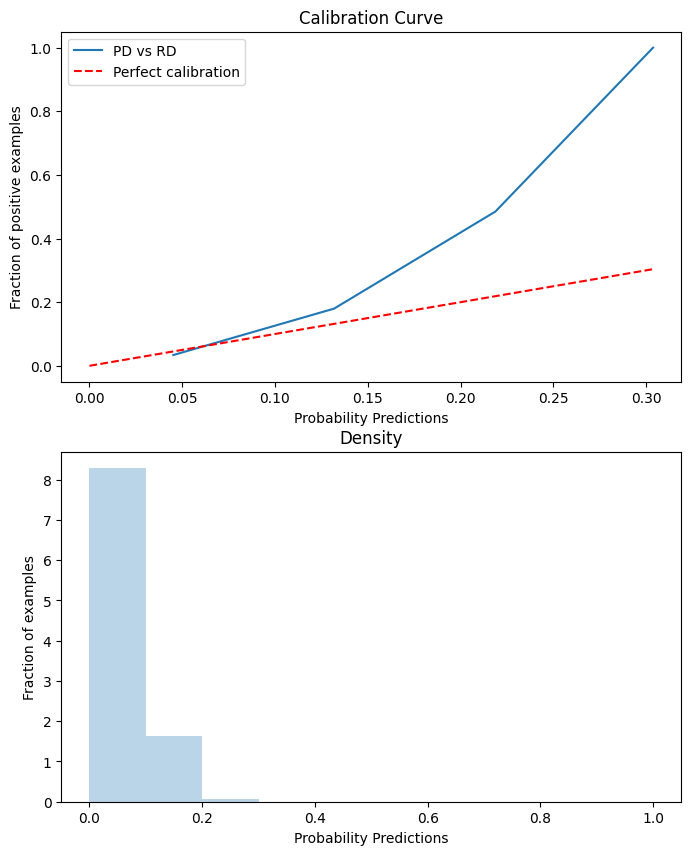

In [ ]:
plot_calibration_curve(df_nc_y, pred_nc[:, 1], bins=10, strategy='uniform')

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(modelo_final, cv='prefit', method='sigmoid')
cal_sigmoid.fit(df_nc_xt, df_nc_y)
prob_sigmoid = cal_sigmoid.predict_proba(df_nc_xt)[:, 1]

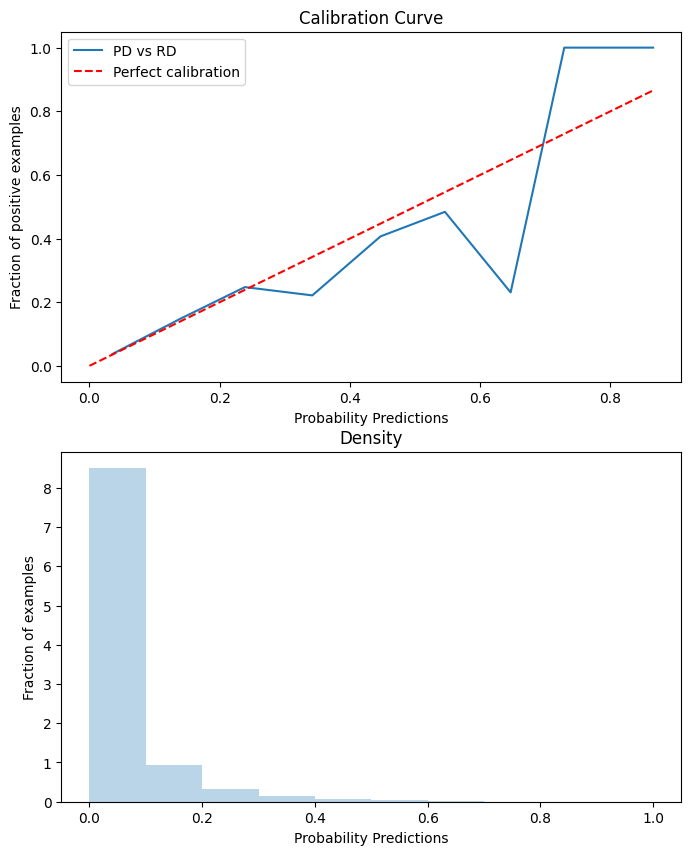

In [ ]:
plot_calibration_curve(df_nc_y, prob_sigmoid, bins=10, strategy='uniform')

In [ ]:
prob_sigmoid

array([0.0559982 , 0.01550842, 0.01650951, ..., 0.02037321, 0.02518257,
       0.03501364])

In [ ]:
print('La PD Promedio Nueva es: ', prob_sigmoid.mean(), 'El RD Nueva es de: ', df_nc_y.mean())

La PD Promedio Nueva es:  0.06129537343675971 El RD Nueva es de:  0.06129499609940934
